### Now for the main event.....ANALYSING DATA!

We will be using pandas in python in order to analyse a dataset.
First we need to import all the necessary packages.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First, we have to read in the data. If we have a csv, we can use the following function to read the data.

In [41]:
housing_data = pd.read_csv("sample_data/california_housing_train.csv", dtype={'longitude':float, 'population':int})

In [42]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population              int64
households            float64
median_income         float64
median_house_value    float64
dtype: object

What if we want to know the column names in the dataset?

In [21]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

We can also try and look at a few rows of our dataset

In [22]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [23]:
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


It's possible to index into a specific row as well

In [24]:
housing_data.iloc[0]

longitude              -114.3100
latitude                 34.1900
housing_median_age       15.0000
total_rooms            5612.0000
total_bedrooms         1283.0000
population             1015.0000
households              472.0000
median_income             1.4936
median_house_value    66900.0000
Name: 0, dtype: float64

We might also want to know the size of our dataset

In [25]:
housing_data.shape

(17000, 9)

In [26]:
len(housing_data)

17000

Another common concern would be about whether there are any NAs in the dataset

In [27]:
housing_data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [37]:
housing_data.isna().sum()

longitude                      0
latitude                       0
housing_median_age             0
total_rooms                    0
total_bedrooms                 0
population                     0
households                     0
median_income                  0
median_house_value             0
median_house_value_discrete    0
dtype: int64

We might want to generally get a sense for the summary statistics in our dataset, such as mean, mode, etc.

In [28]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We might also make a histogram to visualize some of our columns

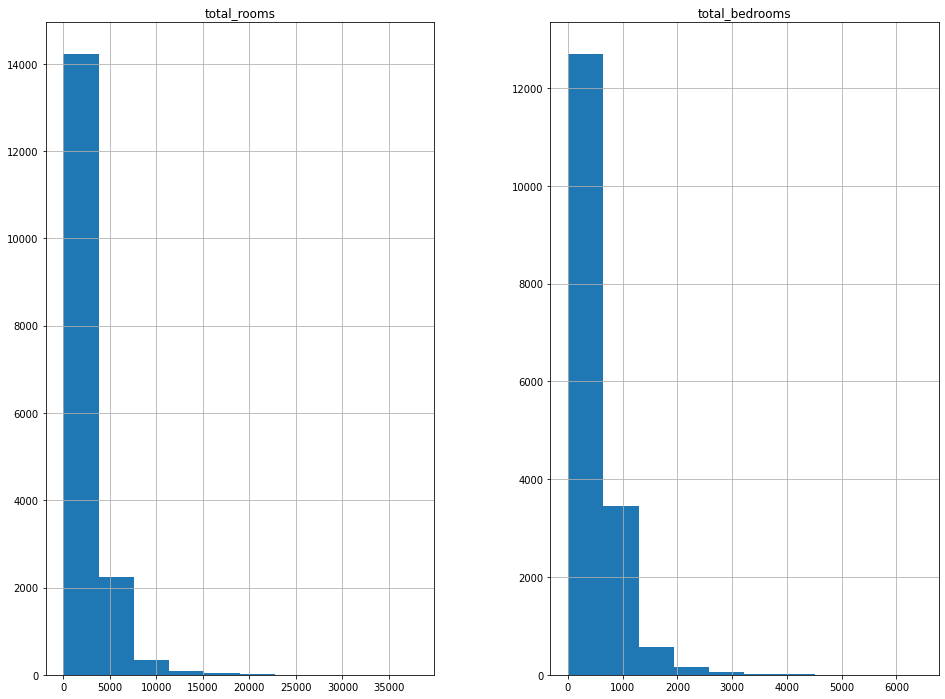

In [29]:
#plot
plt.rcParams['figure.figsize'] = 16, 12
housing_data[['total_rooms', 'total_bedrooms']].hist()
plt.show()

For more on matplotlib, visit: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

Or a scatterplot to understand the relationship between two variables:

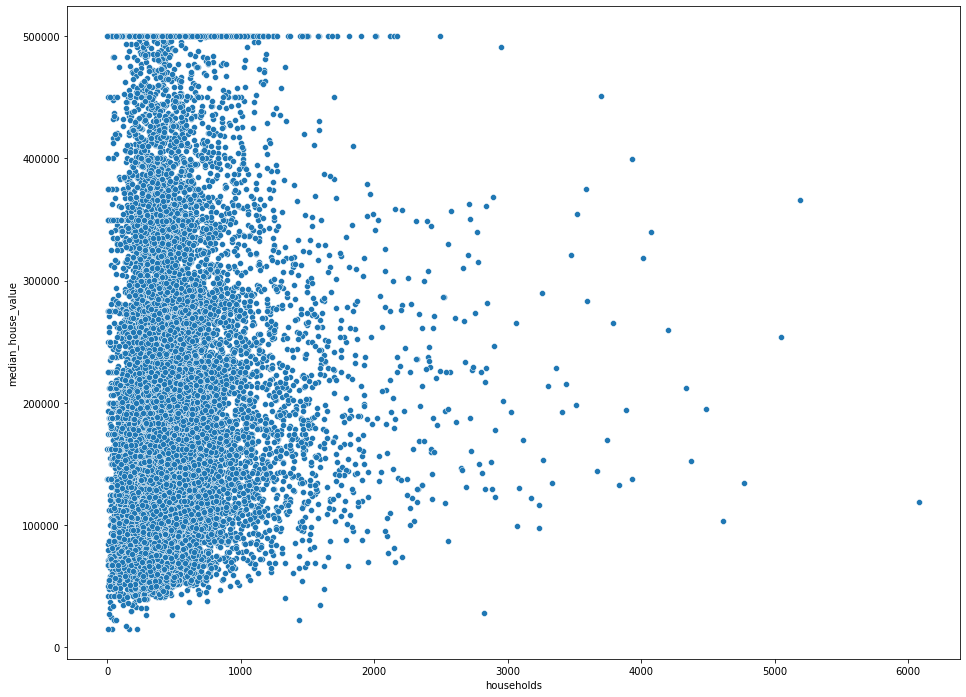

In [44]:
import seaborn as sns
sns.scatterplot(x = 'households', y = 'median_house_value', data = housing_data)

Take a look at the data again. Is it categorical or is it numerical? If it were categorical, there are different summary statistics we could use. Let's convert one of the columns to being categorical using binning.

In [31]:
housing_data['median_house_value_discrete'] = pd.qcut(housing_data['median_house_value'], 8)

In [32]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_discrete
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,"(14998.999, 88300.0]"
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,"(14998.999, 88300.0]"
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,"(14998.999, 88300.0]"
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,"(14998.999, 88300.0]"
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,"(14998.999, 88300.0]"


In [45]:
housing_data['median_house_value_discrete'] = pd.cut(housing_data['median_house_value'], bins=5, labels=['low price', 'medium low price', 'kind of high price', 'super high price', 'crazy high price'])

In [46]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_discrete
0,-114.31,34.19,15.0,5612.0,1283.0,1015,472.0,1.4936,66900.0,low price
1,-114.47,34.40,19.0,7650.0,1901.0,1129,463.0,1.8200,80100.0,low price
2,-114.56,33.69,17.0,720.0,174.0,333,117.0,1.6509,85700.0,low price
3,-114.57,33.64,14.0,1501.0,337.0,515,226.0,3.1917,73400.0,low price
4,-114.57,33.57,20.0,1454.0,326.0,624,262.0,1.9250,65500.0,low price


Sometimes it is helpful to know how many observations we have of each categorical variable.

In [47]:
housing_data[['median_house_value_discrete']].value_counts()

median_house_value_discrete
medium low price               6489
kind of high price             3717
low price                      3689
super high price               1665
crazy high price               1440
dtype: int64

What if we want to convert into a prettier dataframe?

In [54]:
housing_data[['median_house_value_discrete']] \
.value_counts() \
.reset_index(name="counts per home value category")

,median_house_value_discrete,counts per home value category
0,medium low price,6489
1,kind of high price,3717
2,low price,3689
3,super high price,1665
4,crazy high price,1440


How about ordering the categories?

In [35]:
housing_data[['median_house_value_discrete']] \
.value_counts() \
.reset_index(name="counts per home value category") \ 
.sort_values(ascending=True, by='median_house_value_discrete')

,median_house_value_discrete,counts per home value category
0,"(14998.999, 88300.0]",2132
6,"(88300.0, 119400.0]",2121
2,"(119400.0, 151800.0]",2127
1,"(151800.0, 180400.0]",2128
7,"(180400.0, 218000.0]",2120
3,"(218000.0, 265000.0]",2125
5,"(265000.0, 351712.5]",2122
4,"(351712.5, 500001.0]",2125


In [36]:
housing_data.groupby(['median_house_value_discrete']).size().reset_index(name="counts per home value category").sort_values(ascending=True, by='median_house_value_discrete')

,median_house_value_discrete,counts per home value category
0,"(14998.999, 88300.0]",2132
1,"(88300.0, 119400.0]",2121
2,"(119400.0, 151800.0]",2127
3,"(151800.0, 180400.0]",2128
4,"(180400.0, 218000.0]",2120
5,"(218000.0, 265000.0]",2125
6,"(265000.0, 351712.5]",2122
7,"(351712.5, 500001.0]",2125
